# The primary objective is to derive a model that can appropriately estimate the fuel efficiency of various car models with their parameters: number of cylinders, displacement, horsepower and so on.

In [6]:
# importing required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as snf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import seaborn as sns
import operator
from sklearn.metrics import mean_squared_error

In [7]:
# loading the data set suing pandas 
auto_mpg = pd.read_csv("AUTO.csv")

In [8]:
# head of the data set
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# Replacing origin with new names
auto_mpg['Country_code'] = auto_mpg.origin.replace([1,2,3],['USA','Europe','India'])

In [10]:
# Creating dummy colums
auto_mpg=pd.get_dummies(auto_mpg,columns = ['origin'])

In [11]:
# info of the data set like data types of the each varibales
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
 8   Country_code  398 non-null    object 
 9   origin_1      398 non-null    uint8  
 10  origin_2      398 non-null    uint8  
 11  origin_3      398 non-null    uint8  
dtypes: float64(3), int64(3), object(3), uint8(3)
memory usage: 29.3+ KB


In [12]:
# checking which columns have null values
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
Country_code    0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [13]:
# checking which columns have missing values
auto_mpg[auto_mpg['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Country_code,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,71,ford pinto,USA,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,ford maverick,USA,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe,Europe,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra,USA,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,renault 18i,Europe,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl,USA,1,0,0


In [14]:
# Replacing "?" with nan
auto_mpg['horsepower'] = auto_mpg['horsepower'].replace('?',np.NaN)

In [15]:
# checking the missing value column
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
car name        0
Country_code    0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [16]:
# converting 'horsepower' data type from object to float
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(float)

In [17]:
# checking wheather datatype has changed or not
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
 8   Country_code  398 non-null    object 
 9   origin_1      398 non-null    uint8  
 10  origin_2      398 non-null    uint8  
 11  origin_3      398 non-null    uint8  
dtypes: float64(4), int64(3), object(2), uint8(3)
memory usage: 29.3+ KB


In [18]:
# replacing the missing values with mean
auto_mpg['horsepower'].fillna(auto_mpg['horsepower'].mean(),inplace = True)

In [19]:
# Descriptive statistic of the continuous varibales 
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


# Data Visulization

<AxesSubplot:>

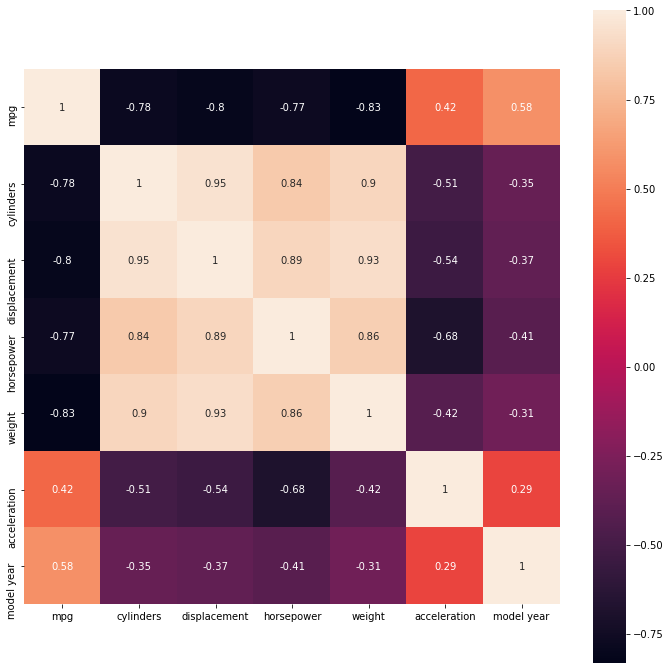

In [20]:
# FInding the correlation between the varibales 
corr = auto_mpg.select_dtypes(include =['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square= True,annot=True)

In [21]:
#checking which cars have largest mpg
auto_mpg.nlargest(10,'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Country_code,origin_1,origin_2,origin_3
322,46.6,4,86.0,65.000000,2110,17.9,80,mazda glc,India,0,0,1
329,44.6,4,91.0,67.000000,1850,13.8,80,honda civic 1500 gl,India,0,0,1
325,44.3,4,90.0,48.000000,2085,21.7,80,vw rabbit c (diesel),Europe,0,1,0
394,44.0,4,97.0,52.000000,2130,24.6,82,vw pickup,Europe,0,1,0
326,43.4,4,90.0,48.000000,2335,23.7,80,vw dasher (diesel),Europe,0,1,0
244,43.1,4,90.0,48.000000,1985,21.5,78,volkswagen rabbit custom diesel,Europe,0,1,0
309,41.5,4,98.0,76.000000,2144,14.7,80,vw rabbit,Europe,0,1,0
330,40.9,4,85.0,104.469388,1835,17.3,80,renault lecar deluxe,Europe,0,1,0
324,40.8,4,85.0,65.000000,2110,19.2,80,datsun 210,India,0,0,1
247,39.4,4,85.0,70.000000,2070,18.6,78,datsun b210 gx,India,0,0,1


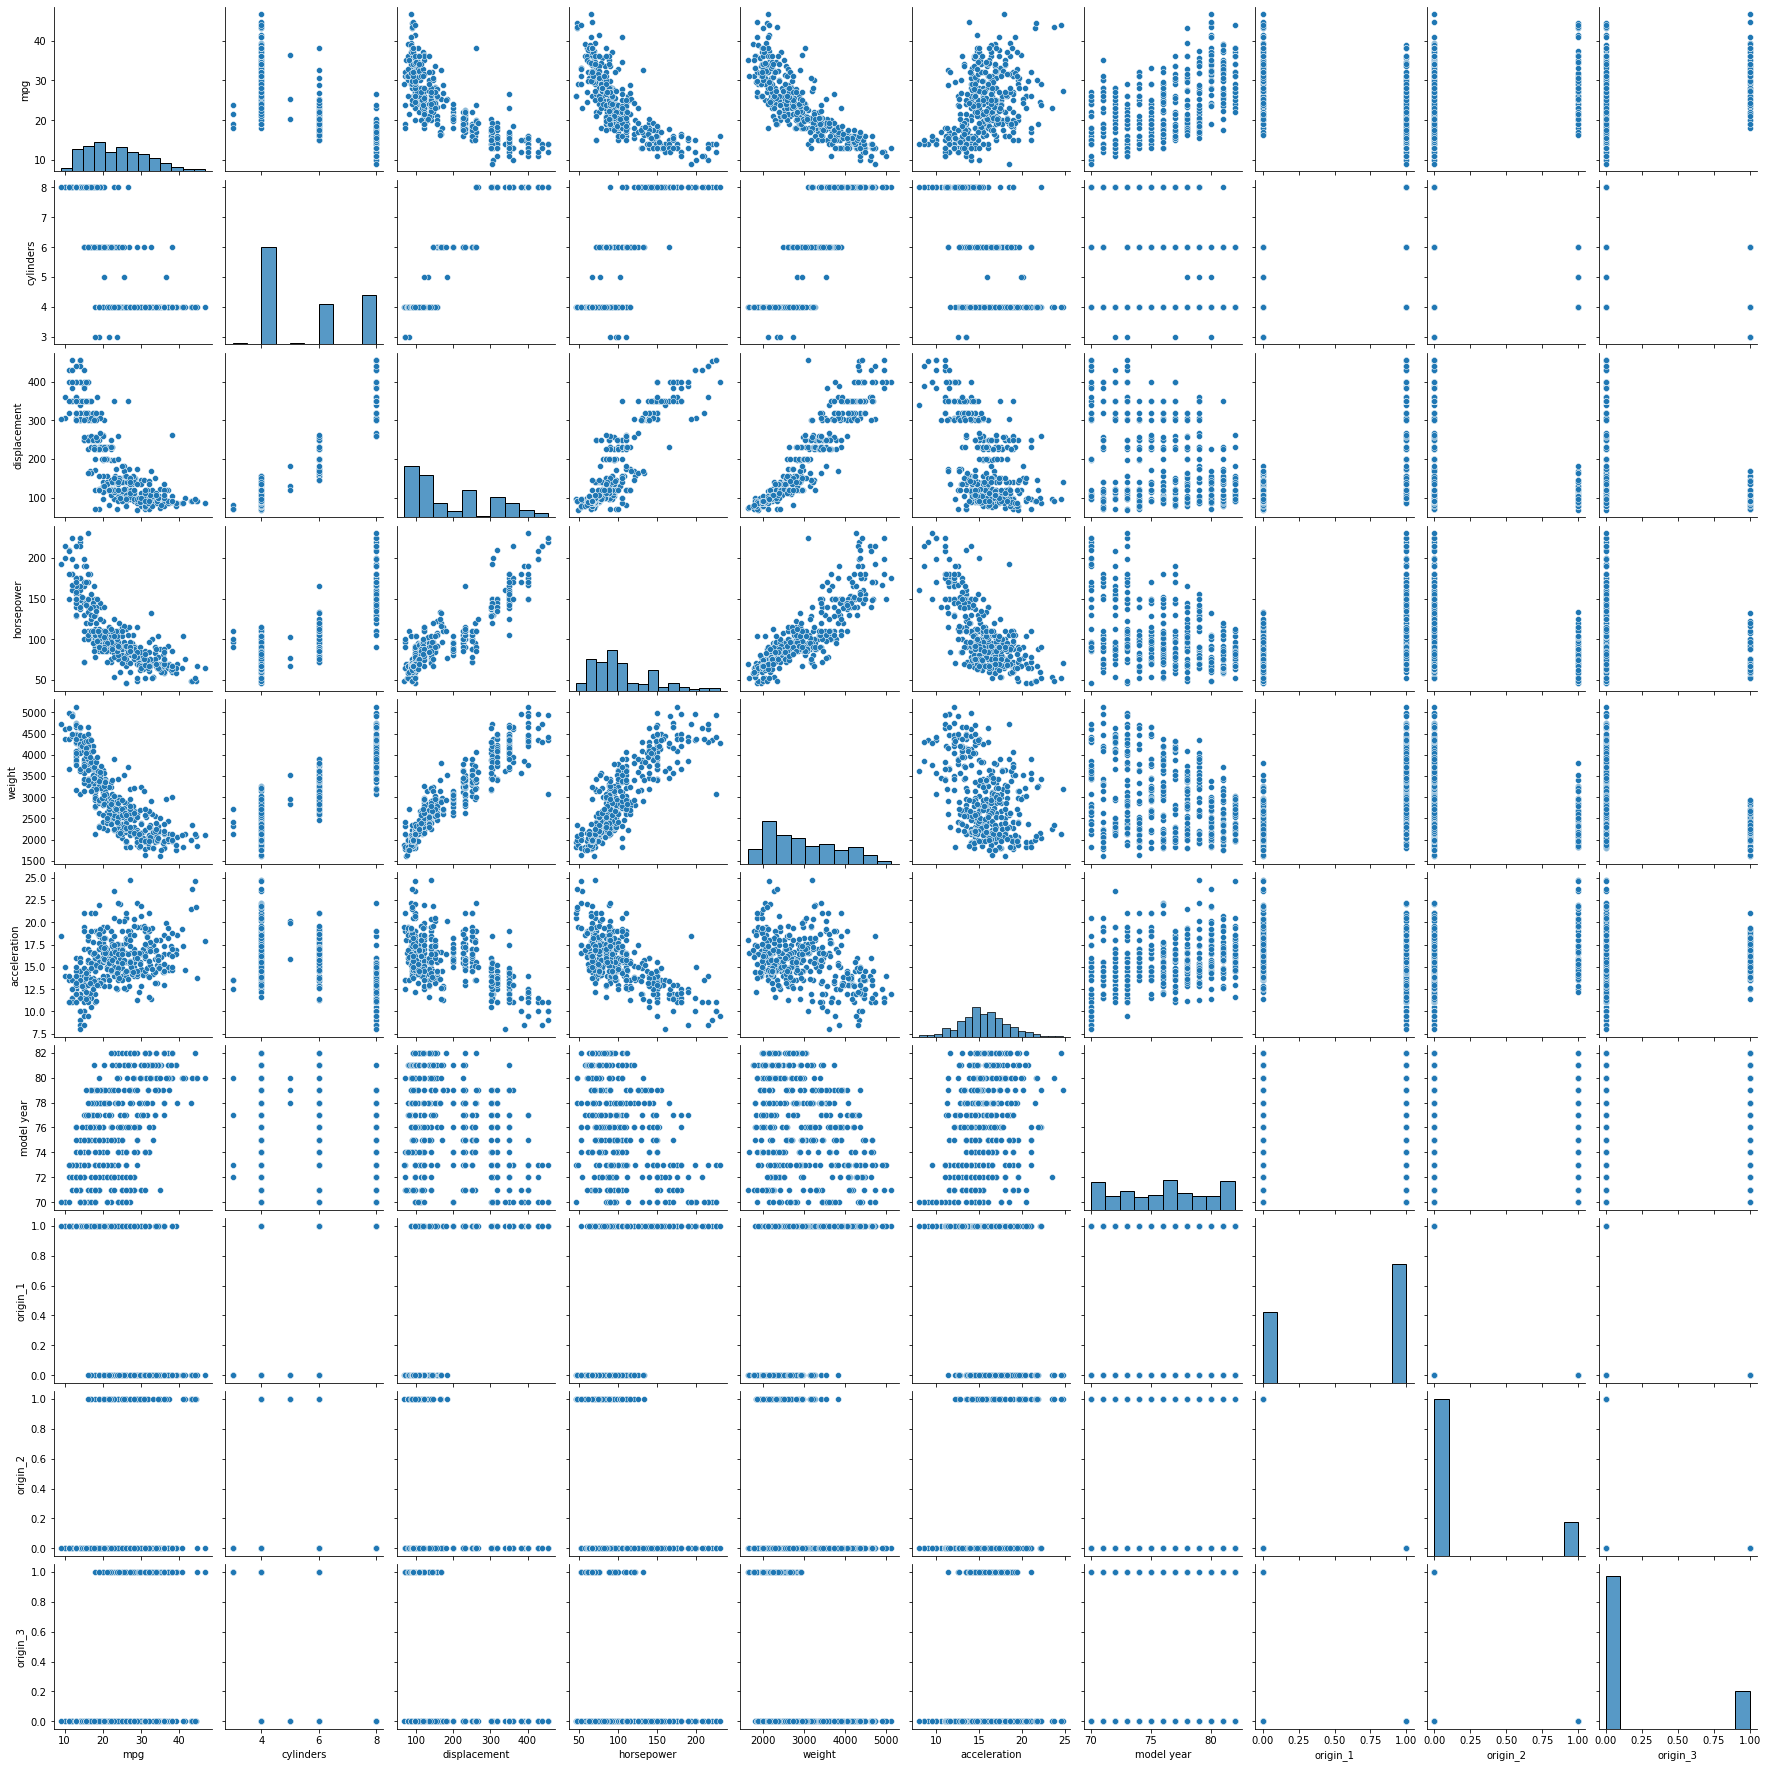

In [22]:
# pairploting
sns.pairplot(auto_mpg)

C:\Users\map\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


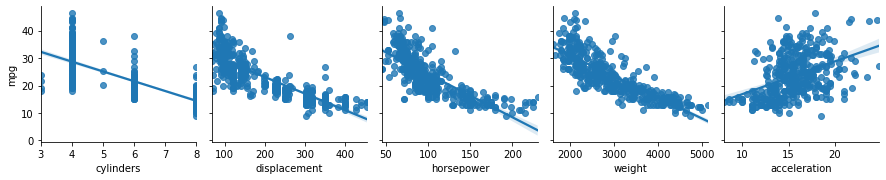

In [23]:
# pairplotting each column with mpg
sns.pairplot(auto_mpg,x_vars=['cylinders','displacement','horsepower','weight','acceleration'], y_vars='mpg', size=2.5, aspect=1,kind='reg')

<AxesSubplot:xlabel='Country_code', ylabel='mpg'>

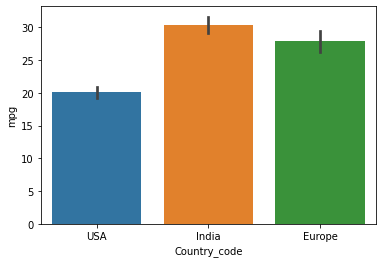

In [24]:
# Bar plotting
sns.barplot(x='Country_code',y='mpg',data=auto_mpg)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

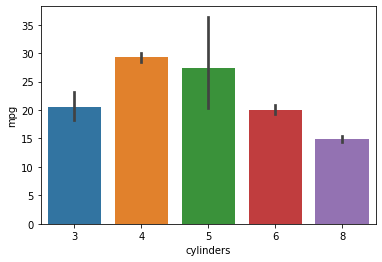

In [25]:
sns.barplot(x='cylinders',y='mpg',data=auto_mpg)

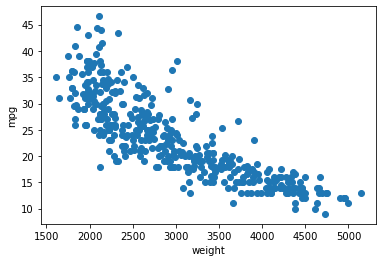

In [26]:
#scatterplot
plt.scatter(auto_mpg.weight, auto_mpg.mpg, marker='o');
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()


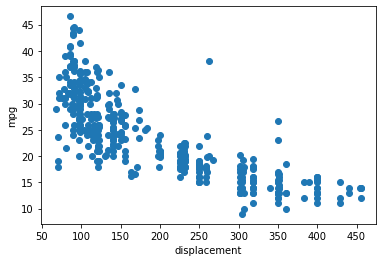

In [27]:
plt.scatter(auto_mpg.displacement, auto_mpg.mpg, marker='o')
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

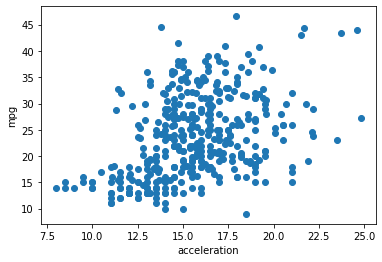

In [28]:
plt.scatter(auto_mpg.acceleration, auto_mpg.mpg, marker='o')
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.show()

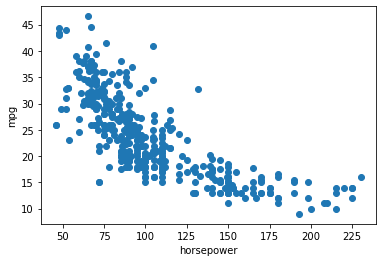

In [29]:
plt.scatter(auto_mpg.horsepower, auto_mpg.mpg, marker='o');
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()


In [30]:
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='binned_horsepower', ylabel='mpg'>

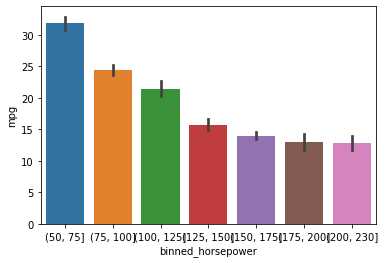

In [51]:
# Bar plotting
bins = [50,75,100,125,150,175,200,230]
auto_mpg['binned_horsepower'] = pd.cut(auto_mpg['horsepower'], bins)
sns.barplot(x='binned_horsepower',y='mpg',data=auto_mpg)

In [48]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Country_code,origin_1,origin_2,origin_3,binned,binned_horsepower
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,USA,1,0,0,"(100, 150]","(125, 150]"
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,USA,1,0,0,"(150, 200]","(150, 175]"
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,USA,1,0,0,"(100, 150]","(125, 150]"
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,USA,1,0,0,"(100, 150]","(125, 150]"
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,USA,1,0,0,"(100, 150]","(125, 150]"


# Model Building 

In [29]:
model1 = snf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin_1+origin_2+origin_3',
                 data = auto_mpg).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          6.46e-103
Time:                        14:41:49   Log-Likelihood:                -1131.1
No. Observations:                 398   AIC:                             2278.
Df Residuals:                     390   BIC:                             2310.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.1579      1.945     17.561      0.000      30.334      37.982
cylinders       -0.5253      0.404     -1.299      0.195      -1.320       0.270
displacement     0.0104      0.010      1.085      0.279      -0.008       0.029
horsepower      -0.0527      0.016     -3.247      0.001      -0.085      -0.021
weight          -0.0051      0.001     -6.386      0.000      -0.007      -0.004
acceleration     0.0046      0.121      0.038      0.970      -0.232       0.242
origin_1         9.9817      0.757     13.177      0.000       8.492      11.471
origin_2        11.3404      0.788     14.394      0.000       9.791      12.889
origin_3        12.8359      0.741     17.314      0.000      11.378      14.293
==============================================================================
Omnibus:                       33.111   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.233
Skew:                           0.628   Prob(JB):                     2.48e-10
Kurtosis:                       4.045   Cond. No.                     1.48e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
auto_mpg_test=auto_mpg.drop('mpg', axis = 1)

In [31]:
y_pred =model1.predict(auto_mpg_test)

In [32]:
MSE = np.square(np.subtract(auto_mpg.mpg,y_pred)).mean()

In [33]:
RMSE = math.sqrt(MSE)

NameError: name 'math' is not defined

In [ ]:
print(MSE)
print(RMSE)

# Data Partitioning 
# 80 - 20

In [34]:
y = auto_mpg.mpg

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg, y, test_size=0.2, random_state=0)

In [ ]:
model2 = snf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin_1+origin_2+origin_3',
                 data = X_train).fit()
model2.summary()

In [ ]:
X_test=X_test.drop('mpg', axis = 1)
y_pred=model2.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(auto_mpg.mpg,y_pred)).mean()
RMSE = math.sqrt(MSE)
print(MSE)
print(RMSE)

# 70 - 30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg, y, test_size=0.3, random_state=1)

In [ ]:
model3 = snf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin_1+origin_2+origin_3',
                 data = X_train).fit()
model3.summary()

In [ ]:
X_test=X_test.drop('mpg', axis = 1)
y_pred=model3.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(auto_mpg.mpg,y_pred)).mean()
RMSE = math.sqrt(MSE)
print(MSE)
print(RMSE)

# 60 - 40

In [35]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg, y, test_size=0.4, random_state=1)

In [36]:
model4 = snf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin_1+origin_2+origin_3',
                 data = X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     73.52
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           3.74e-55
Time:                        14:43:03   Log-Likelihood:                -688.35
No. Observations:                 238   AIC:                             1393.
Df Residuals:                     230   BIC:                             1420.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.0158      2.574     13.214      0.000      28.944      39.088
cylinders       -0.7292      0.594     -1.227      0.221      -1.900       0.442
displacement     0.0066      0.014      0.459      0.646      -0.022       0.035
horsepower      -0.0362      0.022     -1.680      0.094      -0.079       0.006
weight          -0.0051      0.001     -4.369      0.000      -0.007      -0.003
acceleration     0.0219      0.162      0.135      0.893      -0.298       0.341
origin_1        10.1034      1.030      9.808      0.000       8.074      12.133
origin_2        11.4533      1.022     11.211      0.000       9.440      13.466
origin_3        12.4591      1.005     12.401      0.000      10.480      14.439
==============================================================================
Omnibus:                       30.479   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.833
Skew:                           0.816   Prob(JB):                     8.24e-10
Kurtosis:                       4.247   Cond. No.                     1.10e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_test=X_test.drop('mpg', axis = 1)
y_pred=model4.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(auto_mpg.mpg,y_pred)).mean()
RMSE = math.sqrt(MSE)
print(MSE)
print(RMSE)